In [48]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers


In [49]:
df=pd.read_csv("Crystal_structure.csv")
df.insert(18,"Type",None)
df.loc[df['Lowest distortion']=='cubic','Type'] = 1
df.loc[df['Lowest distortion']=='tetragonal','Type'] = 2
df.loc[df['Lowest distortion']=='orthorhombic','Type'] = 3
df.loc[df['Lowest distortion']=='rhombohedral','Type'] = 4

df=df.drop('Lowest distortion',axis=1)

# data pre-processing

df=df.replace('-', np.nan)
df['v(A)']=df['v(A)'].fillna(df['v(A)'].median())
df['v(B)']=df['v(B)'].fillna(df['v(B)'].median())
df['τ']=df['τ'].fillna(df['τ'].median())
df['Type']=df['Type'].fillna(df['Type'].median())

dataset=df.values

df


,Compound,A,B,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Type
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.10,1.10,0.00000,0.000000,-3.248000,0.707107,4.141585,0.800000,1.0
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.10,1.93,0.00000,2.488353,-2.565071,0.758259,4.141585,0.678571,3.0
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.10,1.61,0.00000,1.892894,-1.846714,0.918510,4.141585,0.385714,1.0
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.10,2.18,0.00000,1.932227,-1.577429,0.928078,4.141585,0.371429,3.0
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.10,2.54,0.00000,2.313698,-2.279786,0.764768,4.141585,0.664286,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,False,1,5,0.89,0.72,0.62,1.33,2.36,2.38342,1.745600,-1.572214,0.801621,5.228952455,0.442857,1.0
5325,ZrYO3,Zr,Y,False,2.0,3.0,0.89,0.72,0.90,1.33,1.22,2.38342,2.235124,-2.489571,0.704032,4.141585,0.642857,1.0
5326,ZrYbO3,Zr,Yb,False,2.0,3.0,0.89,0.72,0.95,1.33,1.10,2.38342,2.223981,-2.626821,0.689053,4.141585,0.678571,3.0
5327,ZrZnO3,Zr,Zn,False,2.0,3.0,0.89,0.72,0.74,1.33,1.65,2.38342,2.096141,-2.035750,0.756670,4.141585,0.528571,1.0


In [50]:
X=dataset[:,4:17]
Y=dataset[:,17]
X = np.asarray(X).astype(np.float32)
Y = np.asarray(Y).astype(np.float32)

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


In [51]:
model = Sequential([
    Dense(128, activation='softmax',kernel_regularizer=regularizers.l2(0.01), input_shape=(13,)),
    Dropout(0.2),
    Dense(128, activation='softmax',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(128, activation='softmax',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='softmax',kernel_regularizer=regularizers.l2(0.01)),
])

In [52]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


117/117 [==============================] - 1s 4ms/step - loss: 2.7685 - accuracy: 0.6174 - val_loss: 2.7036 - val_accuracy: 0.6283
Epoch 2/100
117/117 [==============================] - 0s 3ms/step - loss: 2.6423 - accuracy: 0.6174 - val_loss: 2.5805 - val_accuracy: 0.6283
Epoch 3/100
117/117 [==============================] - 0s 3ms/step - loss: 2.5220 - accuracy: 0.6174 - val_loss: 2.4631 - val_accuracy: 0.6283
Epoch 4/100
117/117 [==============================] - 0s 3ms/step - loss: 2.4074 - accuracy: 0.6174 - val_loss: 2.3512 - val_accuracy: 0.6283
Epoch 5/100
117/117 [==============================] - 0s 3ms/step - loss: 2.2981 - accuracy: 0.6174 - val_loss: 2.2446 - val_accuracy: 0.6283
Epoch 6/100
117/117 [==============================] - 0s 3ms/step - loss: 2.1940 - accuracy: 0.6174 - val_loss: 2.1429 - val_accuracy: 0.6283
Epoch 7/100
117/117 [==============================] - 0s 3ms/step - loss: 2.0947 - accuracy: 0.6174 - val_loss: 2.0460 - val_accuracy: 0.6283
Epoch 8/100

In [54]:
model.evaluate(X_test, Y_test)[1]


25/25 [==============================] - 0s 1ms/step - loss: 0.1308 - accuracy: 0.6263


0.6262500286102295

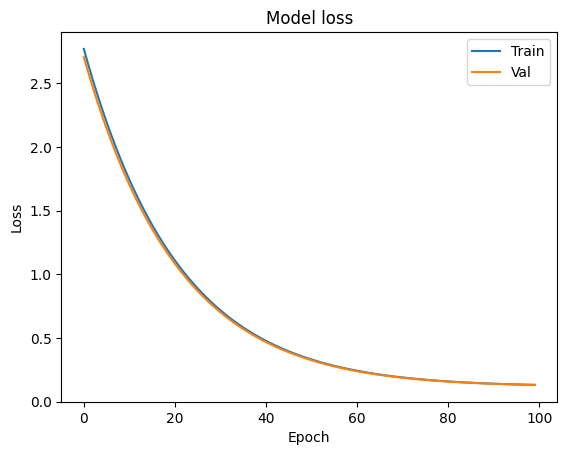

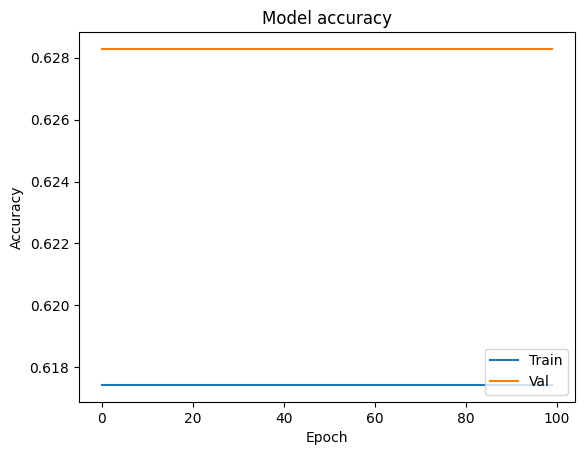

In [55]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [56]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
117/117 [==============================] - 1s 4ms/step - loss: 0.1161 - accuracy: 0.6174 - val_loss: 0.1198 - val_accuracy: 0.6283
Epoch 2/100
117/117 [==============================] - 0s 3ms/step - loss: 0.1234 - accuracy: 0.6174 - val_loss: 0.1235 - val_accuracy: 0.6283
Epoch 3/100
117/117 [==============================] - 0s 3ms/step - loss: 0.1246 - accuracy: 0.6174 - val_loss: 0.1256 - val_accuracy: 0.6283
Epoch 4/100
117/117 [==============================] - 0s 3ms/step - loss: 0.1250 - accuracy: 0.6174 - val_loss: 0.1305 - val_accuracy: 0.6283
Epoch 5/100
117/117 [==============================] - 0s 3ms/step - loss: 0.1305 - accuracy: 0.6174 - val_loss: 0.1310 - val_accuracy: 0.6283
Epoch 6/100
117/117 [==============================] - 0s 3ms/step - loss: 0.1307 - accuracy: 0.6174 - val_loss: 0.1331 - val_accuracy: 0.6283
Epoch 7/100
117/117 [==============================] - 0s 3ms/step - loss: 0.1341 - accuracy: 0.6174 - val_loss: 0.1369 - val_accuracy: 0.6283

In [58]:
model.evaluate(X_test, Y_test)[1]


25/25 [==============================] - 0s 2ms/step - loss: 0.9818 - accuracy: 0.6263


0.6262500286102295

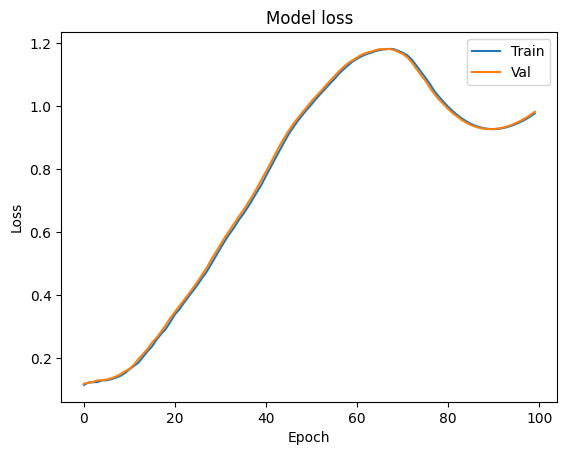

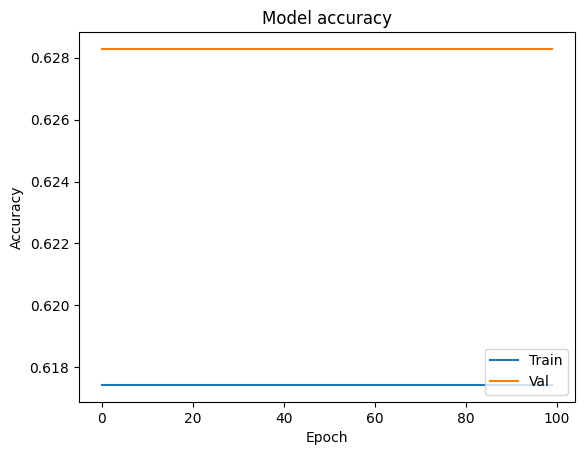

In [59]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [60]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
117/117 [==============================] - 2s 5ms/step - loss: 0.9875 - accuracy: 0.6174 - val_loss: 0.9936 - val_accuracy: 0.6283
Epoch 2/100
117/117 [==============================] - 1s 4ms/step - loss: 0.9996 - accuracy: 0.6174 - val_loss: 1.0057 - val_accuracy: 0.6283
Epoch 3/100
117/117 [==============================] - 0s 4ms/step - loss: 1.0120 - accuracy: 0.6174 - val_loss: 1.0186 - val_accuracy: 0.6283
Epoch 4/100
117/117 [==============================] - 1s 4ms/step - loss: 1.0258 - accuracy: 0.6174 - val_loss: 1.0332 - val_accuracy: 0.6283
Epoch 5/100
117/117 [==============================] - 1s 5ms/step - loss: 1.0408 - accuracy: 0.6174 - val_loss: 1.0489 - val_accuracy: 0.6283
Epoch 6/100
117/117 [==============================] - 0s 3ms/step - loss: 1.0571 - accuracy: 0.6174 - val_loss: 1.0649 - val_accuracy: 0.6283
Epoch 7/100
117/117 [==============================] - 0s 3ms/step - loss: 1.0730 - accuracy: 0.6174 - val_loss: 1.0816 - val_accuracy: 0.6283

In [62]:
model.evaluate(X_test, Y_test)[1]


25/25 [==============================] - 0s 1ms/step - loss: 3.9483 - accuracy: 0.6263


0.6262500286102295

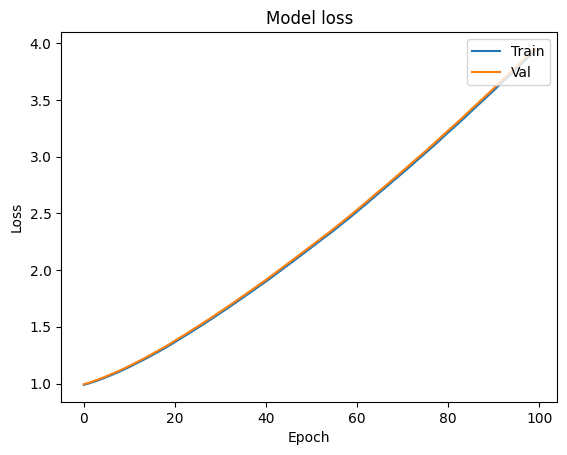

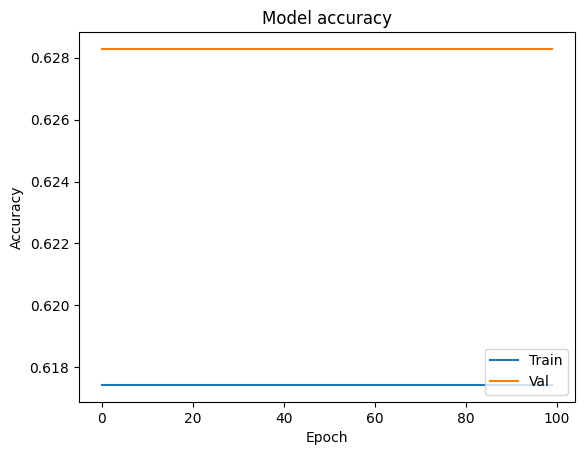

In [63]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [64]:
model.compile(optimizer='adadelta',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
117/117 [==============================] - 1s 5ms/step - loss: 3.9484 - accuracy: 0.6174 - val_loss: 3.9484 - val_accuracy: 0.6283
Epoch 2/100
117/117 [==============================] - 0s 3ms/step - loss: 3.9484 - accuracy: 0.6174 - val_loss: 3.9484 - val_accuracy: 0.6283
Epoch 3/100
117/117 [==============================] - 0s 3ms/step - loss: 3.9485 - accuracy: 0.6174 - val_loss: 3.9485 - val_accuracy: 0.6283
Epoch 4/100
117/117 [==============================] - 0s 3ms/step - loss: 3.9485 - accuracy: 0.6174 - val_loss: 3.9486 - val_accuracy: 0.6283
Epoch 5/100
117/117 [==============================] - 0s 3ms/step - loss: 3.9486 - accuracy: 0.6174 - val_loss: 3.9486 - val_accuracy: 0.6283
Epoch 6/100
117/117 [==============================] - 0s 3ms/step - loss: 3.9487 - accuracy: 0.6174 - val_loss: 3.9487 - val_accuracy: 0.6283
Epoch 7/100
117/117 [==============================] - 0s 3ms/step - loss: 3.9487 - accuracy: 0.6174 - val_loss: 3.9488 - val_accuracy: 0.6283

In [66]:
model.evaluate(X_test, Y_test)[1]


25/25 [==============================] - 0s 2ms/step - loss: 3.9549 - accuracy: 0.6263


0.6262500286102295

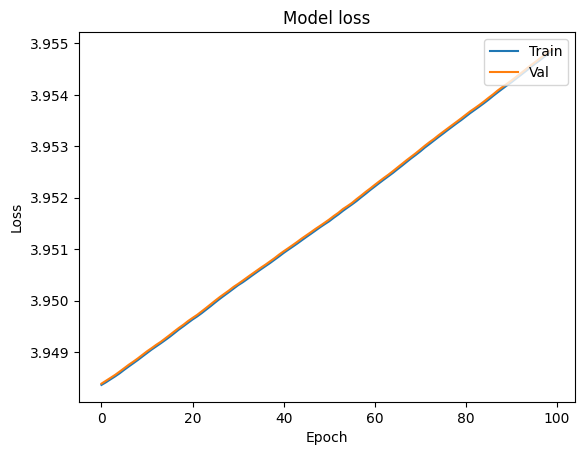

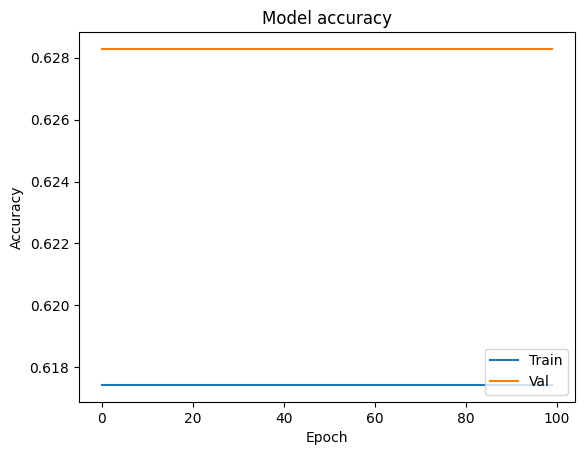

In [67]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()